# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [68]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [69]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 610


In [70]:
# Set the API base URL
url = f'https://api.openweathermap.org/data/2.5/weather?units=metric&appid={weather_api_key}'

# Create endpoint URL with each city
city_url = url + f'&q={cities[0]}'

    

In [71]:
# Parse the JSON and retrieve data
city_weather = requests.get(city_url).json()
city_weather

{'coord': {'lon': 43.2844, 'lat': -11.3847},
 'weather': [{'id': 801,
   'main': 'Clouds',
   'description': 'few clouds',
   'icon': '02d'}],
 'base': 'stations',
 'main': {'temp': 23.16,
  'feels_like': 23.83,
  'temp_min': 23.16,
  'temp_max': 23.16,
  'pressure': 1014,
  'humidity': 88},
 'visibility': 10000,
 'wind': {'speed': 2.57, 'deg': 110},
 'clouds': {'all': 20},
 'dt': 1695353674,
 'sys': {'type': 1,
  'id': 2129,
  'country': 'KM',
  'sunrise': 1695351409,
  'sunset': 1695394969},
 'timezone': 10800,
 'id': 921786,
 'name': 'Mitsamiouli',
 'cod': 200}

In [72]:

# Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
city_lat = city_weather['coord']['lat']
city_lng = city_weather['coord']['lon']
city_max_temp =  city_weather['main']['temp_max']
city_wind = city_weather['wind']['speed']
city_country = city_weather['sys']['country']
city_date = city_weather['dt']


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [73]:
# Set the API base URL
url =  f'https://api.openweathermap.org/data/2.5/weather?units=metric&appid={weather_api_key}'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

# Create endpoint URL with each city
    city_url = url + f'&q={city}'
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()


        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp =  city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")



Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | mitsamiouli
Processing Record 2 of Set 1 | vila velha
Processing Record 3 of Set 1 | juneau
Processing Record 4 of Set 1 | kabalo
Processing Record 5 of Set 1 | shumikha
Processing Record 6 of Set 1 | taoudenni
Processing Record 7 of Set 1 | blackmans bay
Processing Record 8 of Set 1 | port-aux-francais
Processing Record 9 of Set 1 | sing buri
Processing Record 10 of Set 1 | phon charoen
Processing Record 11 of Set 1 | ust-tsilma
Processing Record 12 of Set 1 | klyuchi
Processing Record 13 of Set 1 | waitangi
Processing Record 14 of Set 1 | noumea
Processing Record 15 of Set 1 | iqaluit
Processing Record 16 of Set 1 | coyhaique
Processing Record 17 of Set 1 | afaahiti
Processing Record 18 of Set 1 | karasuk
Processing Record 19 of Set 1 | agat village
Processing Record 20 of Set 1 | quellon
Processing Record 21 of Set 1 | wailua homesteads
Processing Record 22 of Set 1 | grytviken
Processing Reco

In [74]:
import pandas as pd

city_data_df = pd.DataFrame(city_data)
# Show Record Count
city_data_df.count()

City          583
Lat           583
Lng           583
Max Temp      583
Humidity      583
Cloudiness    583
Wind Speed    583
Country       583
Date          583
dtype: int64

In [75]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,mitsamiouli,-11.3847,43.2844,23.16,88,20,2.57,KM,1695353674
1,vila velha,-20.3297,-40.2925,21.64,91,20,2.06,BR,1695353675
2,juneau,58.3019,-134.4197,12.00,100,100,2.57,US,1695353483
3,kabalo,-6.0500,26.9167,22.98,72,100,0.89,CD,1695353675
4,shumikha,55.2261,63.2961,14.85,66,96,6.13,RU,1695353676


In [76]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [77]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,mitsamiouli,-11.3847,43.2844,23.16,88,20,2.57,KM,1695353674
1,vila velha,-20.3297,-40.2925,21.64,91,20,2.06,BR,1695353675
2,juneau,58.3019,-134.4197,12.00,100,100,2.57,US,1695353483
3,kabalo,-6.0500,26.9167,22.98,72,100,0.89,CD,1695353675
4,shumikha,55.2261,63.2961,14.85,66,96,6.13,RU,1695353676


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

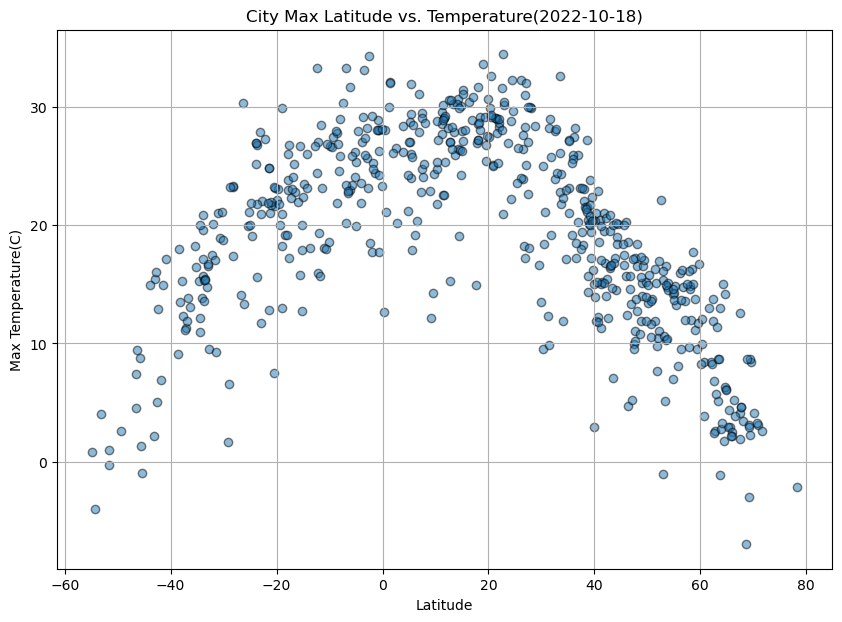

In [94]:
# Build scatter plot for latitude vs. temperature
plt.figure(figsize=(10,7))

x_axis = city_data_df['Lat']
y_axis = city_data_df['Max Temp']


plt.scatter(x_axis, y_axis, edgecolor='black', linewidth=1, marker='o',
            alpha=0.5)

# Incorporate the other graph properties
plt.title(f"City Max Latitude vs. Temperature(2022-10-18)")
plt.ylabel("Max Temperature(C)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

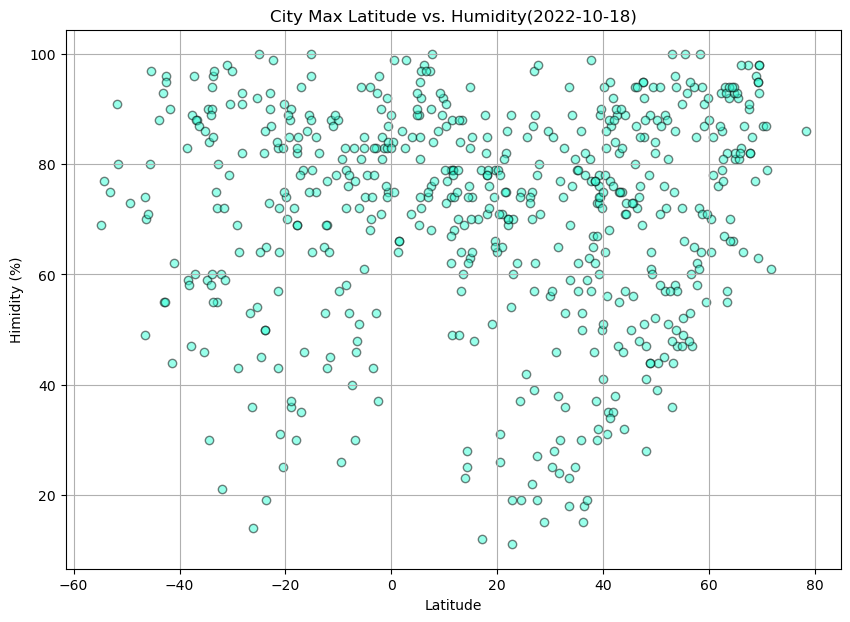

In [95]:
# Build the scatter plots for latitude vs. humidity
plt.figure(figsize=(10,7))

x_axis = city_data_df['Lat']
y_axis = city_data_df['Humidity']


plt.scatter(x_axis, y_axis, edgecolor='black', linewidth=1, marker='o',
            alpha=0.5,c='#33FFD7')


# Incorporate the other graph properties
plt.title(f"City Max Latitude vs. Humidity(2022-10-18)")
plt.ylabel("Himidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

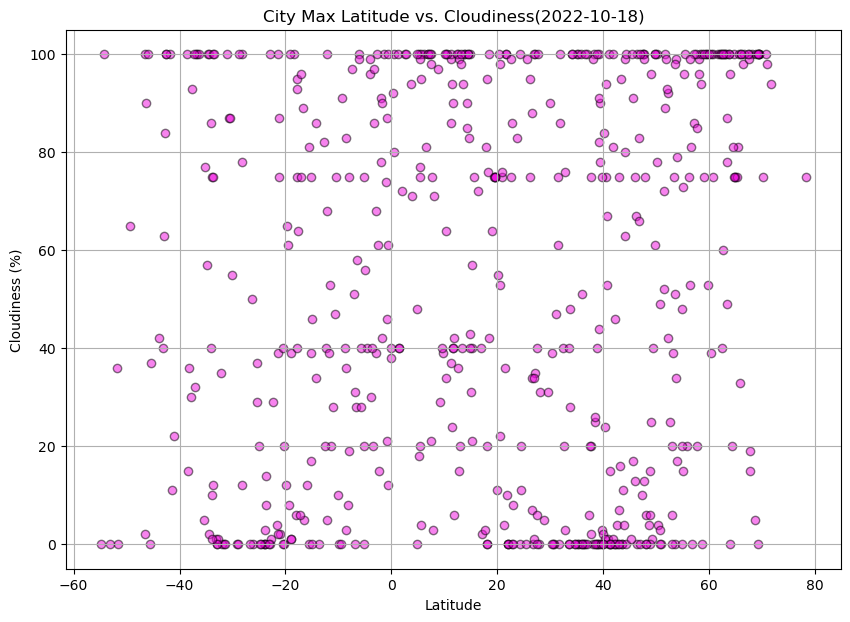

In [96]:
# Build the scatter plots for latitude vs. cloudiness
plt.figure(figsize=(10,7))


x_axis = city_data_df['Lat']
y_axis = city_data_df['Cloudiness']

plt.scatter(x_axis, y_axis, edgecolor='black', linewidth=1, marker='o',
            alpha=0.5,c='#F009DF')

# Incorporate the other graph properties
plt.title(f"City Max Latitude vs. Cloudiness(2022-10-18)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

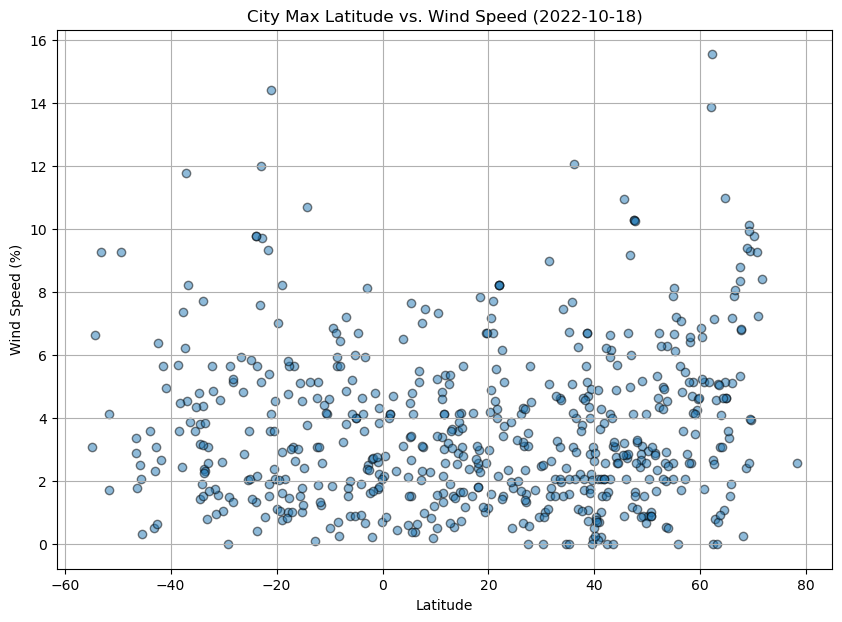

In [97]:
# Build the scatter plots for latitude vs. wind speed
plt.figure(figsize=(10,7))

x_axis = city_data_df['Lat']
y_axis = city_data_df['Wind Speed']

plt.scatter(x_axis, y_axis, edgecolor='black', linewidth=1, marker='o',
            alpha=0.5)

# Incorporate the other graph properties
plt.title(f"City Max Latitude vs. Wind Speed (2022-10-18)")
plt.ylabel("Wind Speed (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [134]:
# Define a function to create Linear Regression plots

def lin_regress(x_axis, y_axis, xt, yt, title):
    # Perform linear regression
    slope, intercept, rvalue, pvalue, stderr = linregress(x_axis, y_axis)

    # Calculate the regression line
    regress_values = x_axis * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Create the scatter plot
    plt.scatter(x_axis, y_axis, edgecolor='black', linewidth=1, marker='o',
            alpha=0.5)
    
    # Plot the regression line
    plt.plot(x_axis, regress_values, "r-")  # Fixed this line
    
    # Annotate the plot with the regression equation
    plt.annotate(line_eq, (x_axis.min(), y_axis.max()), fontsize=12, color="red")
    
    # Set labels and title
    plt.xlabel(xt)
    plt.ylabel(yt)
    plt.title(title)
    
    # Calculate and print the R-squared value
    r_squared = rvalue**2
    print(f"The r-value is: {r_squared}")

    # Display the plot (if needed)
plt.show()

In [105]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df =city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,juneau,58.3019,-134.4197,12.00,100,100,2.57,US,1695353483
4,shumikha,55.2261,63.2961,14.85,66,96,6.13,RU,1695353676
5,taoudenni,22.6783,-3.9836,34.42,11,86,3.44,ML,1695353676
8,sing buri,14.8500,100.2333,30.08,63,100,0.73,TH,1695353677
9,phon charoen,18.0333,103.1667,31.64,71,95,2.42,TH,1695353677


In [106]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df =city_data_df[city_data_df['Lat'] < 0]


# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,mitsamiouli,-11.3847,43.2844,23.16,88,20,2.57,KM,1695353674
1,vila velha,-20.3297,-40.2925,21.64,91,20,2.06,BR,1695353675
3,kabalo,-6.0500,26.9167,22.98,72,100,0.89,CD,1695353675
6,blackmans bay,-43.0167,147.3167,15.41,55,63,2.32,AU,1695353676
7,port-aux-francais,-49.3500,70.2167,2.62,73,65,9.28,TF,1695353676


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.675225473451854


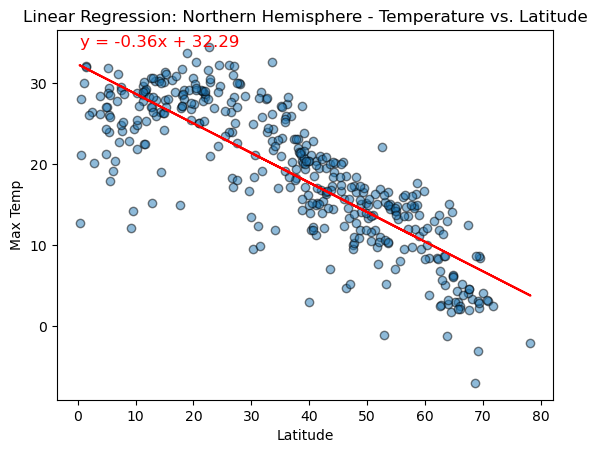

In [135]:
# Linear regression on Northern Hemisphere
x_axis = northern_hemi_df['Lat']
y_axis = northern_hemi_df['Max Temp']
xt = 'Latitude'
yt = 'Max Temp'
title = 'Linear Regression: Northern Hemisphere - Temperature vs. Latitude'

lin_regress(x_axis, y_axis, xt, yt, title=title)

The r-value is: 0.5991590801324388


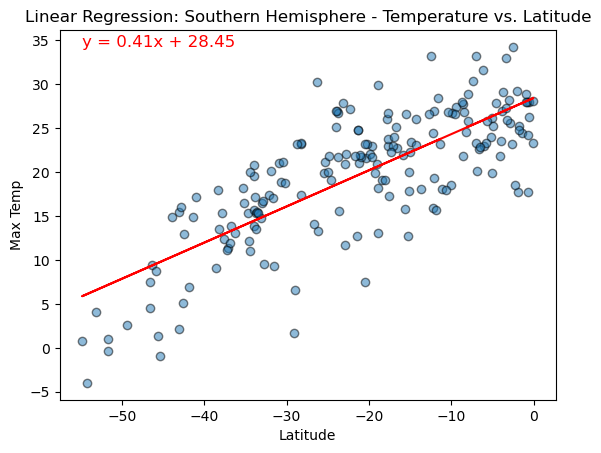

In [136]:
# Linear regression on Southern Hemisphere
x_axis = southern_hemi_df['Lat']
y_axis = southern_hemi_df['Max Temp']
xt = 'Latitude'
yt = 'Max Temp'
title = 'Linear Regression: Southern Hemisphere - Temperature vs. Latitude'

lin_regress(x_axis, y_axis, xt, yt, title=title)


**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.004696760338166532


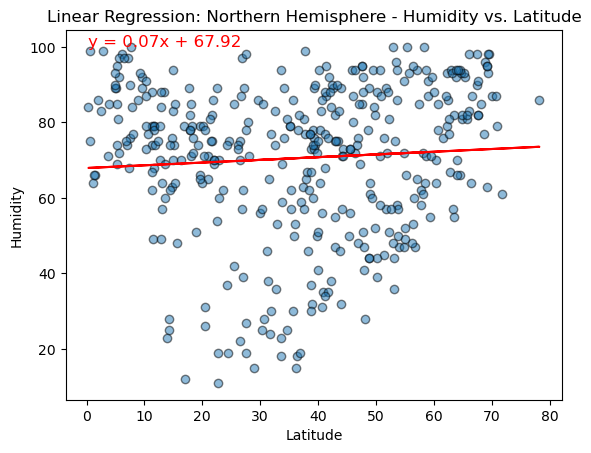

In [137]:
# Northern Hemisphere
x_axis = northern_hemi_df['Lat']
y_axis = northern_hemi_df['Humidity']
xt = 'Latitude'
yt = 'Humidity'
title = 'Linear Regression: Northern Hemisphere - Humidity vs. Latitude'

lin_regress(x_axis, y_axis, xt, yt, title=title)


The r-value is: 2.0005742634820605e-05


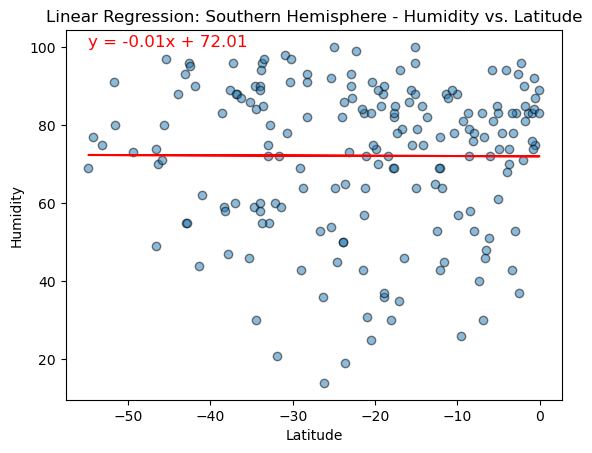

In [138]:
# Southern Hemisphere
x_axis = southern_hemi_df['Lat']
y_axis = southern_hemi_df['Humidity']
xt = 'Latitude'
yt = 'Humidity'
title = 'Linear Regression: Southern Hemisphere - Humidity vs. Latitude'

lin_regress(x_axis, y_axis, xt, yt, title=title)


**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.0024334468513798296


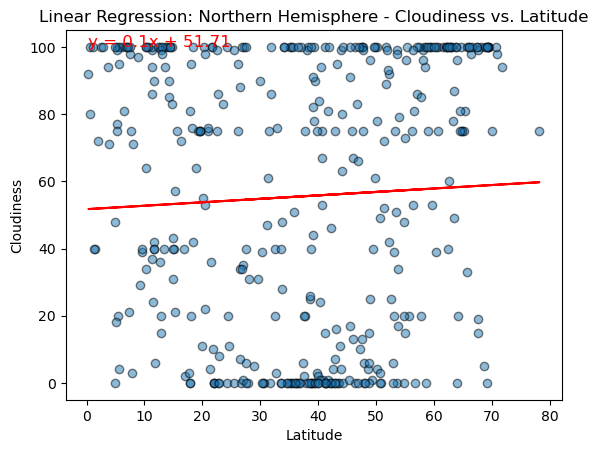

In [139]:
# Northern Hemisphere
x_axis = northern_hemi_df['Lat']
y_axis = northern_hemi_df['Cloudiness']
xt = 'Latitude'
yt = 'Cloudiness'

title = 'Linear Regression: Northern Hemisphere - Cloudiness vs. Latitude'

lin_regress(x_axis, y_axis, xt, yt, title=title)

The r-value is: 0.0008895762310761815


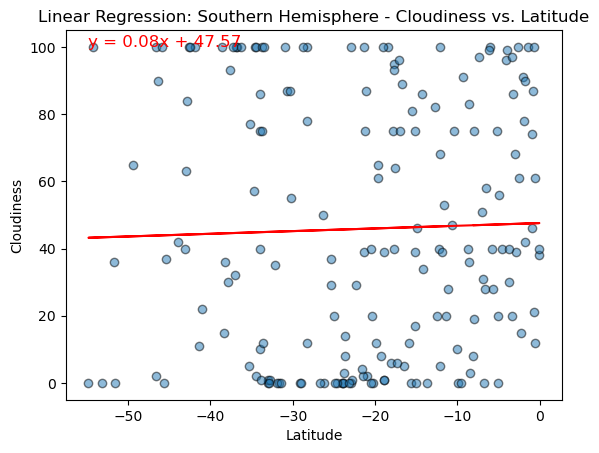

In [140]:
# Southern Hemisphere
x_axis = southern_hemi_df['Lat']
y_axis = southern_hemi_df['Cloudiness']
xt = 'Latitude'
yt = 'Cloudiness'
title = 'Linear Regression: Southern Hemisphere - Cloudiness vs. Latitude'

lin_regress(x_axis, y_axis, xt, yt, title=title)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.055633382406105845


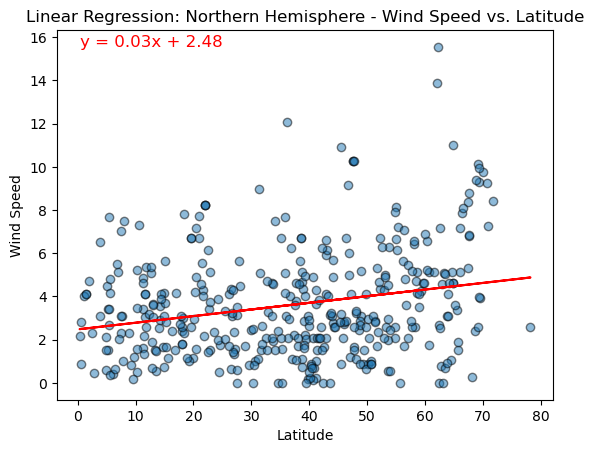

In [141]:
# Northern Hemisphere
x_axis = northern_hemi_df['Lat']
y_axis = northern_hemi_df['Wind Speed']
xt = 'Latitude'
yt = 'Wind Speed'

title = 'Linear Regression: Northern Hemisphere - Wind Speed vs. Latitude'

lin_regress(x_axis, y_axis, xt, yt, title=title)

The r-value is: 0.010904082511719307


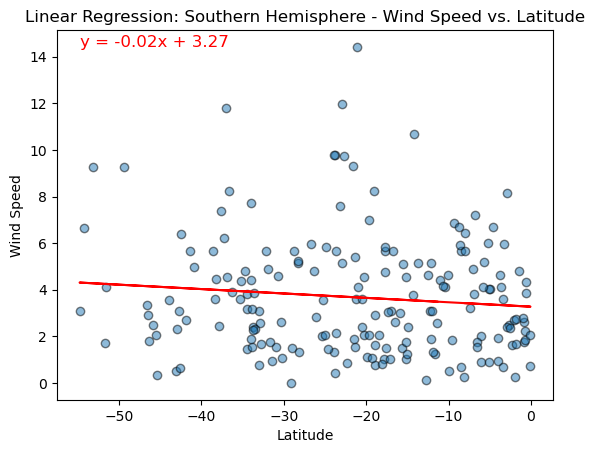

In [142]:
# Southern Hemisphere
x_axis = southern_hemi_df['Lat']
y_axis = southern_hemi_df['Wind Speed']
xt = 'Latitude'
yt = 'Wind Speed'
title = 'Linear Regression: Southern Hemisphere - Wind Speed vs. Latitude'

lin_regress(x_axis, y_axis, xt, yt, title=title)

**Discussion about the linear relationship:** YOUR RESPONSE HERE